In [1]:
# import library
import numpy as np
import csv
import matplotlib.pyplot as plt
from math import pi

import pandas as pd

from sklearn.model_selection import train_test_split
from sklearn import datasets
from sklearn import svm
from sklearn.model_selection import cross_val_score

In [17]:
cluster1=pd.read_csv('./clustered_data/cluster_1.csv')
cluster2=pd.read_csv('./clustered_data/cluster_2.csv')
cluster3=pd.read_csv('./clustered_data/cluster_3.csv')
cluster4=pd.read_csv('./clustered_data/cluster_4.csv')
cluster5=pd.read_csv('./clustered_data/cluster_5.csv')
cluster1 = cluster1.as_matrix()
cluster2 = cluster2.as_matrix()
cluster3 = cluster3.as_matrix()
cluster4 = cluster4.as_matrix()
cluster5 = cluster5.as_matrix()
cluster4.shape

(19716, 7)

# split data in training, validation and  testing data.
90% for training data

10% for testing data

In [3]:
rainfallCluster1 = cluster1[:,6]
rainfallCluster2 = cluster2[:,6]
rainfallCluster3 = cluster3[:,6]
rainfallCluster4 = cluster4[:,6]
rainfallCluster5 = cluster5[:,6]
N = 100    ##my time horizon

##cluster 1
data = np.zeros((len(rainfallCluster1)-N-1,N))
n = data.shape[0]
target = []
for i in range(n): 
    data[i] = rainfallCluster1[i:N+i]
    target.append(rainfallCluster1[N+i])
target = np.array(target)
Xtrain,Xtest, ytrain, ytest = train_test_split(data, target, test_size=0.1, random_state=1)

##cluster 2
data2 = np.zeros((len(rainfallCluster2)-N-1,N))
n2 = data2.shape[0]
target2 = []
for i in range(n2): 
    data2[i] = rainfallCluster2[i:N+i]
    target2.append(rainfallCluster2[N+i])
target2 = np.array(target2)
Xtrain2,Xtest2, ytrain2, ytest2 = train_test_split(data2, target2, test_size=0.1, random_state=1)


data3 = np.zeros((len(rainfallCluster3)-N-1,N))
n3 = data3.shape[0]
target3 = []
for i in range(n3): 
    data3[i] = rainfallCluster3[i:N+i]
    target3.append(rainfallCluster3[N+i])
target3 = np.array(target3)
Xtrain3,Xtest3, ytrain3, ytest3 = train_test_split(data3, target3, test_size=0.1, random_state=1)


data4 = np.zeros((len(rainfallCluster4)-N-1,N))
n4 = data4.shape[0]
target4 = []
for i in range(n4): 
    data4[i] = rainfallCluster4[i:N+i]
    target4.append(rainfallCluster4[N+i])
target4 = np.array(target4)
Xtrain4,Xtest4, ytrain4, ytest4 = train_test_split(data4, target4, test_size=0.1, random_state=1)


data5 = np.zeros((len(rainfallCluster5)-N-1,N))
n5 = data5.shape[0]
target5 = []
for i in range(n5): 
    data5[i] = rainfallCluster5[i:N+i]
    target5.append(rainfallCluster5[N+i])
target5 = np.array(target5)
Xtrain5,Xtest5, ytrain5, ytest5 = train_test_split(data5, target5, test_size=0.1, random_state=1)


In [6]:
from sklearn.ensemble import RandomForestRegressor
from sklearn import metrics
modelRF = RandomForestRegressor(random_state = 42)
from pprint import pprint
# Look at parameters used by our current forest
print('Parameters currently in use:\n')
pprint(modelRF.get_params())

Parameters currently in use:

{'bootstrap': True,
 'criterion': 'mse',
 'max_depth': None,
 'max_features': 'auto',
 'max_leaf_nodes': None,
 'min_impurity_split': 1e-07,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 10,
 'n_jobs': 1,
 'oob_score': False,
 'random_state': 42,
 'verbose': 0,
 'warm_start': False}


/usr/lib/python3/dist-packages/sklearn/ensemble/weight_boosting.py:29: DeprecationWarning: numpy.core.umath_tests is an internal NumPy module and should not be imported. It will be removed in a future NumPy release.
  from numpy.core.umath_tests import inner1d


In [12]:
from sklearn.model_selection import RandomizedSearchCV
# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 200, stop = 2000, num = 10)]
# Number of features to consider at every split
max_features = ['auto', 'sqrt']
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(10, 110, num = 5)]
max_depth.append(None)
# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 4]
# Method of selecting samples for training each tree
bootstrap = [True, False]
# Create the random grid
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}
pprint(random_grid)

{'bootstrap': [True, False],
 'max_depth': [10, 35, 60, 85, 110, None],
 'max_features': ['auto', 'sqrt'],
 'min_samples_leaf': [1, 2, 4],
 'min_samples_split': [2, 5, 10],
 'n_estimators': [200, 400, 600, 800, 1000, 1200, 1400, 1600, 1800, 2000]}


In [ ]:
# Use the random grid to search for best hyperparameters
# First create the base model to tune
modelRF = RandomForestRegressor()
# Random search of parameters, using 3 fold cross validation, 
# search across 10 different combinations, and use all available cores
rf_random = RandomizedSearchCV(estimator = modelRF, param_distributions = random_grid, n_iter = 5, cv = 2, verbose=2, random_state=42, n_jobs = -1)
# Fit the random search model
rf_random.fit(Xtrain4,ytrain4)

Fitting 2 folds for each of 5 candidates, totalling 10 fits
[CV] max_depth=110, bootstrap=True, max_features=sqrt, n_estimators=200, min_samples_split=10, min_samples_leaf=2 
[CV] max_depth=110, bootstrap=True, max_features=sqrt, n_estimators=200, min_samples_split=10, min_samples_leaf=2 
[CV] max_depth=35, bootstrap=False, max_features=auto, n_estimators=1000, min_samples_split=2, min_samples_leaf=2 
[CV] max_depth=35, bootstrap=False, max_features=auto, n_estimators=1000, min_samples_split=2, min_samples_leaf=2 
[CV] max_depth=10, bootstrap=False, max_features=auto, n_estimators=200, min_samples_split=10, min_samples_leaf=2 
[CV] max_depth=10, bootstrap=False, max_features=auto, n_estimators=200, min_samples_split=10, min_samples_leaf=2 
[CV] max_depth=10, bootstrap=False, max_features=auto, n_estimators=1200, min_samples_split=5, min_samples_leaf=1 
[CV] max_depth=10, bootstrap=False, max_features=auto, n_estimators=1200, min_samples_split=5, min_samples_leaf=1 
[CV]  max_depth=110,

[Parallel(n_jobs=-1)]: Done   7 out of  10 | elapsed:  9.3min remaining:  4.0min


[CV]  max_depth=35, bootstrap=False, max_features=auto, n_estimators=1000, min_samples_split=2, min_samples_leaf=2 -   4.6s


Process ForkPoolWorker-6:
Process ForkPoolWorker-5:
Process ForkPoolWorker-8:
Process ForkPoolWorker-3:
Process ForkPoolWorker-7:
Process ForkPoolWorker-4:
Traceback (most recent call last):
Traceback (most recent call last):
  File "/usr/lib/python3.5/multiprocessing/process.py", line 249, in _bootstrap
    self.run()
  File "/usr/lib/python3.5/multiprocessing/process.py", line 249, in _bootstrap
    self.run()
  File "/usr/lib/python3.5/multiprocessing/process.py", line 93, in run
    self._target(*self._args, **self._kwargs)
Traceback (most recent call last):
  File "/usr/lib/python3.5/multiprocessing/process.py", line 249, in _bootstrap
    self.run()
  File "/usr/lib/python3.5/multiprocessing/process.py", line 93, in run
    self._target(*self._args, **self._kwargs)
  File "/usr/lib/python3.5/multiprocessing/pool.py", line 108, in worker
    task = get()
  File "/usr/lib/python3.5/multiprocessing/process.py", line 93, in run
    self._target(*self._args, **self._kwargs)
  File "/u

In [ ]:
rf_random.best_params_

In [ ]:
from sklearn.model_selection import GridSearchCV
# Create the parameter grid 
param_grid = {
    'bootstrap': [True],
    'max_depth': [80, 90, 100, 110],
    'max_features': [2, 3],
    'min_samples_leaf': [3, 4, 5],
    'min_samples_split': [8, 10, 12],
    'n_estimators': [100, 200, 300, 1000]
}
# Create a based model
rfmodel = RandomForestRegressor()
# Instantiate the grid search model
grid_search = GridSearchCV(estimator = rfmodel, param_grid = param_grid, 
                          cv = 3, n_jobs = -1, verbose = 2)

In [ ]:
# Fit the grid search to the data
grid_search.fit(Xtrain,ytrain)
grid_search.best_params_

Cluster 1
R^2 score 0.18814653447692076
Variance 0.18825344851814985
Error 162.8913880058876


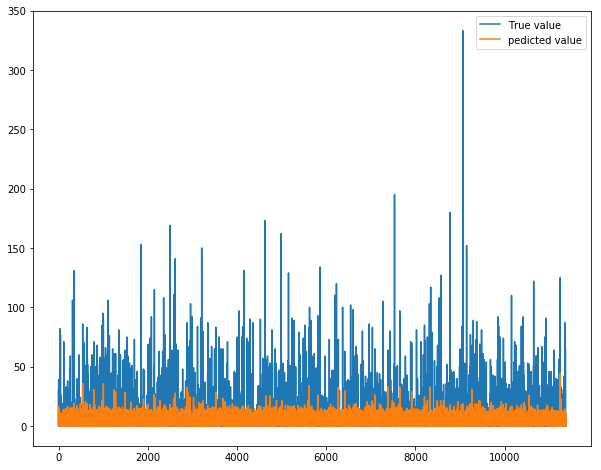

NameError: name 'pred' is not defined

In [9]:
model = RandomForestRegressor(bootstrap=True,
                              max_depth= 100,
                              max_features= 3,
                              min_samples_leaf= 3,
                              min_samples_split= 8,
                              n_estimators= 1000)

ytest =ytest.reshape(-1,1)
model.fit(Xtrain,ytrain)
predict1 = model.predict(Xtest)
print('Cluster 1')
print('==============================')
print('R^2 score' ,metrics.r2_score(ytest, predict1))
print('==============================')
print('Variance', metrics.explained_variance_score(ytest, predict1))
print('=================================')
print('Error', metrics.mean_squared_error(ytest, predict1))
print('===================================')
plt.figure(figsize=(10,8))
plt.plot(ytest)
plt.plot(predict1)
plt.legend(['True value', 'pedicted value'])
plt.show()
print(metrics.accuracy_score(pred,test_target))
#X.shape, y.shape, X1.shape, y1.shape

In [112]:
ytest2 =ytest2.reshape(-1,1)
model.fit(Xtrain2,ytrain2)
predict2 = model.predict(Xtest2)
print('Cluster 2')
print('==============================')
print('R^2 score' ,metrics.r2_score(ytest2, predict2))
print('==============================')
print('Variance', metrics.explained_variance_score(ytest2, predict2))
print('=================================')
print('Error', metrics.mean_squared_error(ytest2, predict2))
print('===================================')

# plt.figure(figsize=(10,8))
# plt.plot(ytest)
# plt.plot(predict1)
# plt.show()

Cluster 2
R^2 score 0.1452592115657222
Variance 0.1509741100793075
Error 298.28131038860454


In [108]:
ytest3 =ytest3.reshape(-1,1)
model.fit(Xtrain3,ytrain3)
predict3 = model.predict(Xtest3)
print('Cluster 3')
print('==============================')
print('R^2 score' ,metrics.r2_score(ytest3, predict3))
print('==============================')
print('Variance', metrics.explained_variance_score(ytest3, predict3))
print('================================')
print('MSE', metrics.mean_squared_error(ytest3, predict3))
print('=================================')

Cluster 3
R^2 score 0.08465767546347724
Variance 0.08500059463903087
MSE 384.08010240644154


In [109]:
ytest4 =ytest4.reshape(-1,1)
model.fit(Xtrain4,ytrain4)
predict4 = model.predict(Xtest4)
print('Cluster 4')
print('==============================')
print('R^2 score' ,metrics.r2_score(ytest4, predict4))
print('==============================')
print('Variance', metrics.explained_variance_score(ytest4, predict4))
print('================================')
print('MSE', metrics.mean_squared_error(ytest4, predict4))
print('=================================')

Cluster 4
R^2 score 0.13186677383546808
Variance 0.13248912331933937
MSE 839.3629180726003


In [110]:
ytest5 =ytest5.reshape(-1,1)
model.fit(Xtrain5,ytrain5)
predict5 = model.predict(Xtest5)
print('Cluster 5')
print('==============================')
print('R^2 score' ,metrics.r2_score(ytest5, predict5))
print('==============================')
print('Variance', metrics.explained_variance_score(ytest5, predict5))
print('================================')
print('MSE', metrics.mean_squared_error(ytest5, predict5))
print('=================================')

Cluster 5
R^2 score 0.09331035969229262
Variance 0.094029838982857
MSE 580.5729763536251


In [116]:
station1 = cluster5=pd.read_csv('./WorkstationsData/1.csv')
station1 = station1.as_matrix()
station1.shape

(17111, 6)

In [119]:
rainfall_1= station1[:,5]
N = 100    ##my time horizon

##cluster 1
data_1 = np.zeros((len(rainfall_1)-N-1,N))
n = data_1.shape[0]
target_1 = []
for i in range(n): 
    data_1[i] = rainfallCluster1[i:N+i]
    target_1.append(rainfallCluster1[N+i])

Xtrain_1,Xtest_1, ytrain_1, ytest_1 = train_test_split(data_1, target_1, test_size=0.1, random_state=1)

[0,
 1,
 1,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 18,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 14,
 53,
 0,
 38,
 4,
 0,
 1,
 21,
 16,
 141,
 28,
 0,
 0,
 0,
 0,
 26,
 4,
 37,
 1,
 0,
 0,
 0,
 2,
 17,
 25,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 9,
 0,
 0,
 11,
 21,
 7,
 1,
 0,
 0,
 0,
 0,
 0,
 2,
 0,
 31,
 2,
 97,
 16,
 10,
 91,
 11,
 9,
 17,
 12,
 0,
 101,
 11,
 2,
 0,
 0,
 0,
 13,
 0,
 0,
 69,
 48,
 107,
 12,
 2,
 0,
 1,
 1,
 2,
 3,
 84,
 28,
 5,
 0,
 1,
 0,
 6,
 3,
 7,
 8,
 24,
 15,
 1,
 2,
 0,
 3,
 0,
 3,
 1,
 2,
 3,
 13,
 28,
 0,
 28,
 11,
 6,
 31,
 4,
 0,
 3,
 8,
 1,
 5,
 0,
 0,
 0,
 9,
 32,
 72,
 7,
 3,
 6,
 24,
 0,
 0,
 0,
 0,
 0,
 0,
 36,
 5,
 4,
 10,
 0,
 1,
 0,
 0,
 4,
 0,
 10,
 40,
 1,
 41,
 125,
 39,
 17,
 2,
 0,
 0,
 2,
 0,
 0,
 0,
 2,
 7,
 1,
 27,
 0,
 0,
 62,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 44,
 0,
 5,
 48,
 60,
 39,
 51,
 6,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 15,
 0,
 0,
 13,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0